
# Machine Learning


# Importing Libraries & Data

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# 3D visualizer
from mpl_toolkits.mplot3d import Axes3D

# ANOVA Test
from scipy.stats import f_oneway

# XGBoost
from xgboost import XGBRegressor
from xgboost import cv
import xgboost as xgb

# array for storing results
models = []
results = []

In [ ]:
data = pd.read_csv('train_cleaned.csv')
data.head()

,ID,DeliveryPersonID,DeliveryPersonAge,Ratings,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,OrderDate,TimeOrdered,TimeOrderPickedUp,WeatherConditions,RoadTrafficDensity,VechicleCondition,TypeOfOrder,TypeOfVehicle,MultipleDeliveries,Festival,City,TimeTaken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1,No,Metropolitian,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43685 entries, 0 to 43684
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   43685 non-null  object 
 1   DeliveryPersonID     43685 non-null  object 
 2   DeliveryPersonAge    43685 non-null  int64  
 3   Ratings              43685 non-null  float64
 4   RestaurantLat        43685 non-null  float64
 5   RestaurantLon        43685 non-null  float64
 6   DeliveryLocationLat  43685 non-null  float64
 7   DeliveryLocationLon  43685 non-null  float64
 8   OrderDate            43685 non-null  object 
 9   TimeOrdered          43685 non-null  object 
 10  TimeOrderPickedUp    43685 non-null  object 
 11  WeatherConditions    43594 non-null  object 
 12  RoadTrafficDensity   43685 non-null  object 
 13  VechicleCondition    43685 non-null  int64  
 14  TypeOfOrder          43685 non-null  object 
 15  TypeOfVehicle        43685 non-null 

# Developing ML Models

#### We want to predict TimeTaken:
##### - use numerical data:
    - with univariate linear regression
    - with multivariate linear regression
##### - use both numerical and categorical data: 
    - with decision trees
    - with random forest
    - with lasso regression
    - with XGBoost

# 1. Using Numerical Data

Out of the 19 features available, the numerical ones are only `DeliveryPersonAge` and `Ratings` are numerical. Because `TimeTaken` is also numerical, linear regression is a good model to start with.

## 1.1 Univariate Linear Regression

### 1.1.1 Check correlation

<AxesSubplot:>

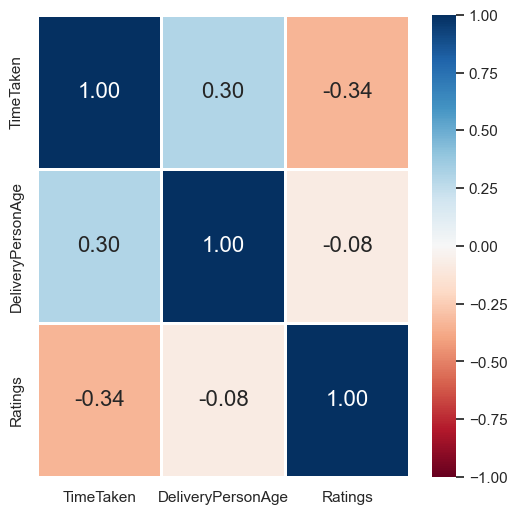

In [ ]:
df = data[["TimeTaken", "DeliveryPersonAge", "Ratings"]]

f = plt.figure(figsize=(6, 6))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 16}, cmap = "RdBu")

Both have decent correlation and about the same degree of correlation, hence we will try to use both for linear regression.

### 1.1.2 Creating the model

In [ ]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    
    plt.show()
    compare = pd.DataFrame(np.array([[r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred)], 
                                     [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred)]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Train Set','Test Set'])
    display(compare)
    
    results.append([r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred)])
    Xvar = 'Age' if Xvar == "DeliveryPersonAge" else Xvar
    models.append(f'Uni LinReg {Xvar}')

Intercept 	: b =  [11.95632206]
Coefficients 	: a =  [[0.48615283]]


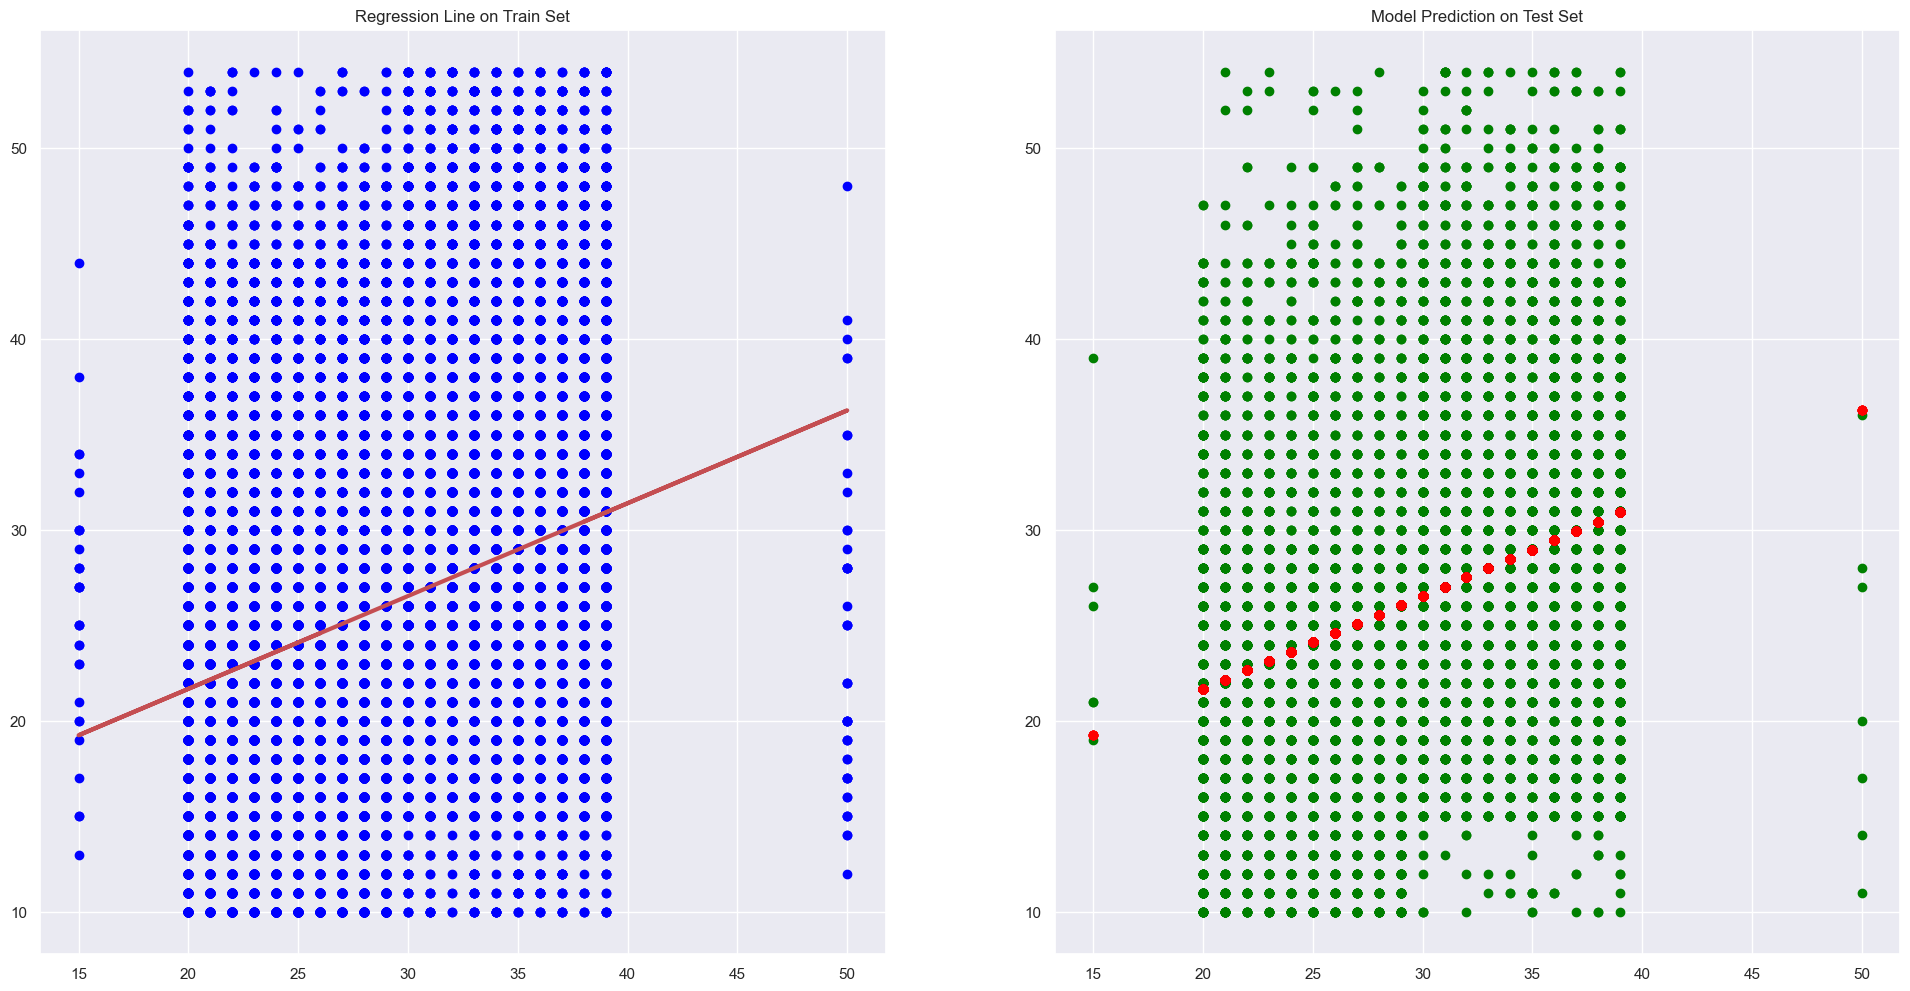

,R^2 Score,MSE
Train Set,0.091160,79.855369
Test Set,0.082976,80.162816


In [ ]:
univariateLinearRegression(Xvar = "DeliveryPersonAge", yvar = "TimeTaken", df = data)

Intercept 	: b =  [70.66478282]
Coefficients 	: a =  [[-9.57180853]]


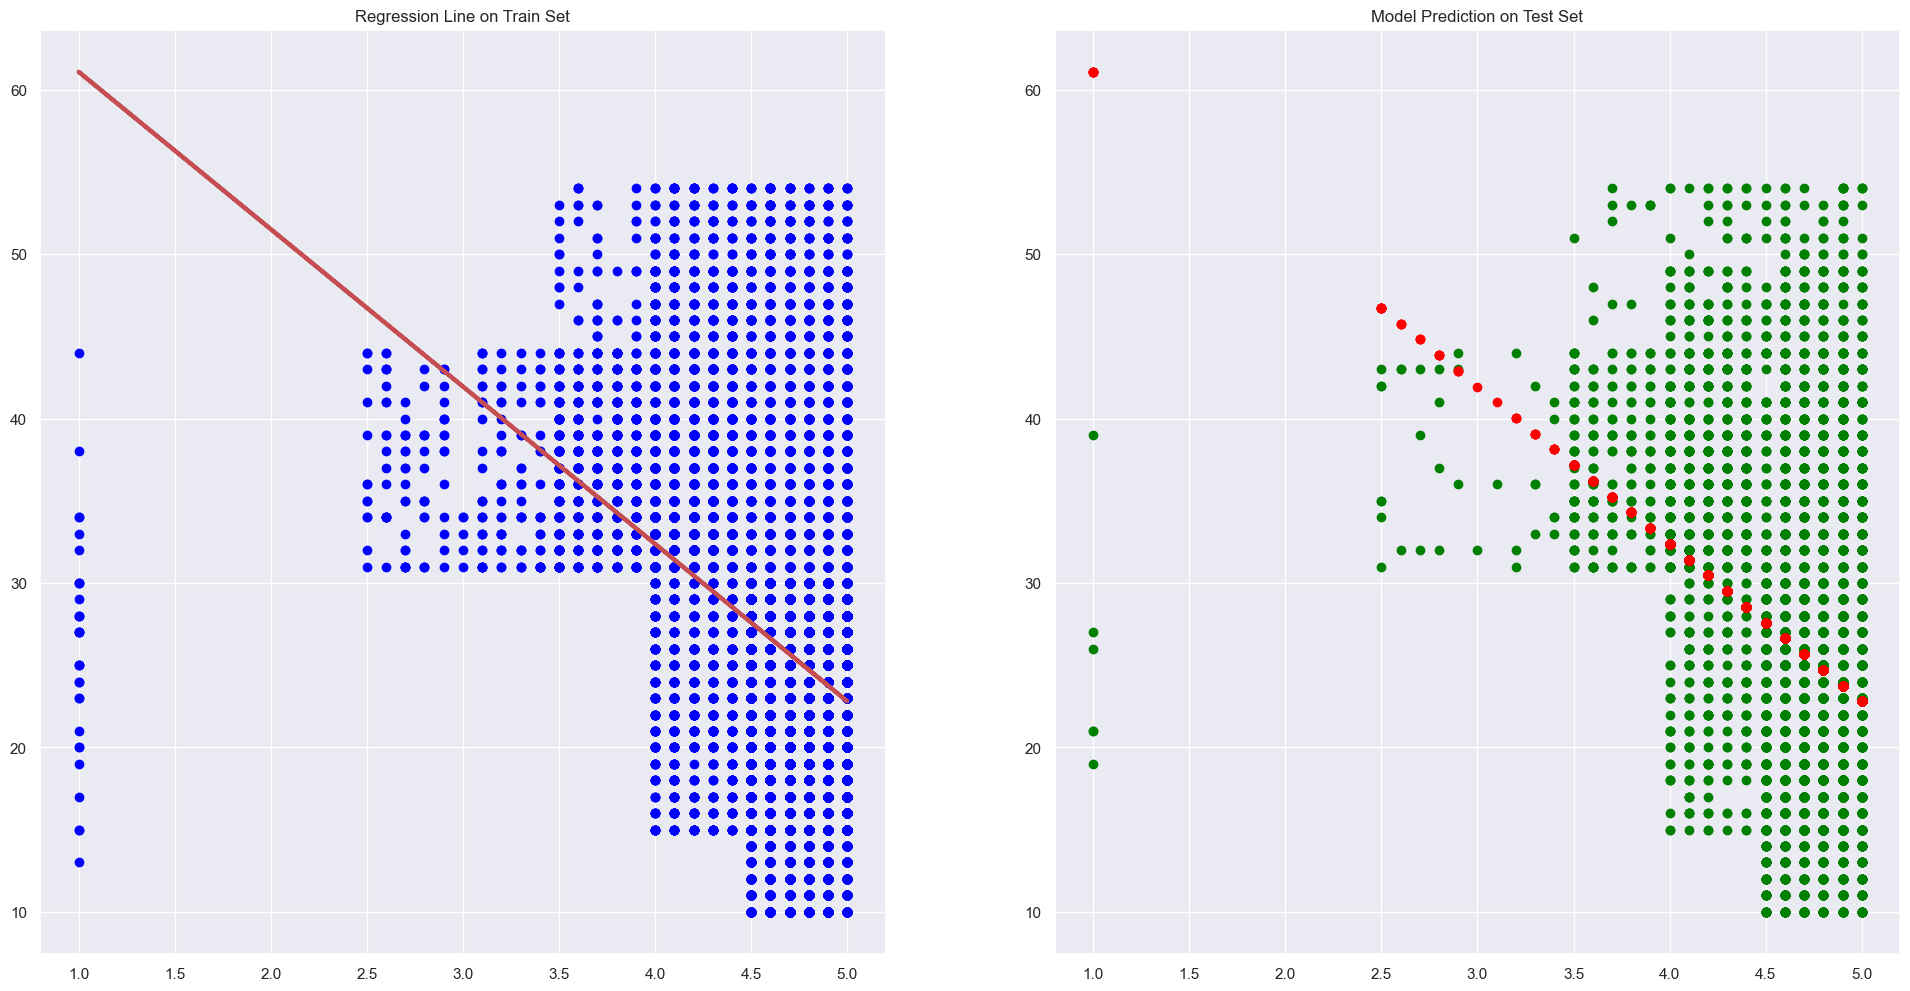

,R^2 Score,MSE
Train Set,0.116175,77.657425
Test Set,0.116581,77.225152


In [ ]:
univariateLinearRegression(Xvar = "Ratings", yvar = "TimeTaken", df = data)

## 1.2 Multivariate Linear Regression

Using only 1 variable to predict yields bad results, hence we will try multivariate regresison to improve the results. We will use both `DeliveryPersonAge` and `Ratings` to predict `TimeTaken`.

In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(data['TimeTaken'])
X = pd.DataFrame(data[["DeliveryPersonAge", "Ratings"]])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

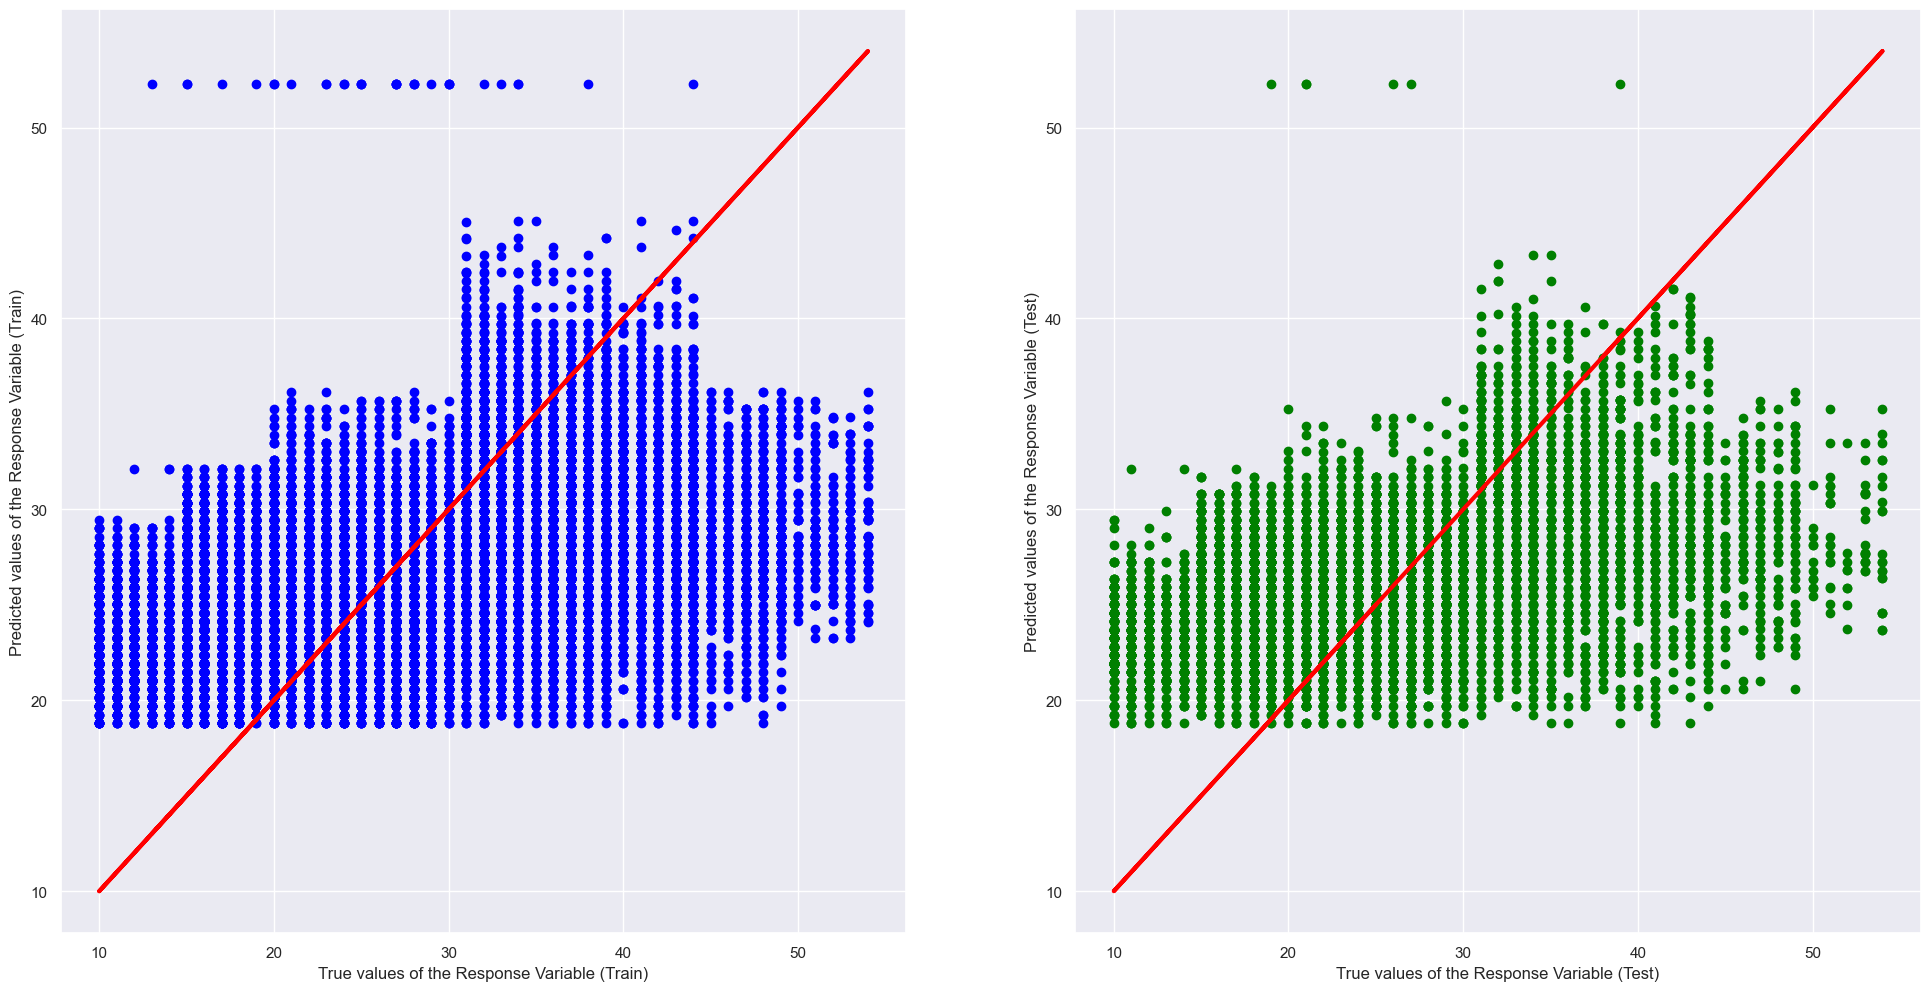

In [ ]:
# Predict on train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'red', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'red', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
compare = pd.DataFrame(np.array([[r2_score(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred)], 
                                     [r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred)]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Train Set','Test Set'])
display(compare)

results.append([r2_score(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred)])
models.append(f'Multi LinReg')

,R^2 Score,MSE
Train Set,0.191209,71.064530
Test Set,0.187739,71.004839


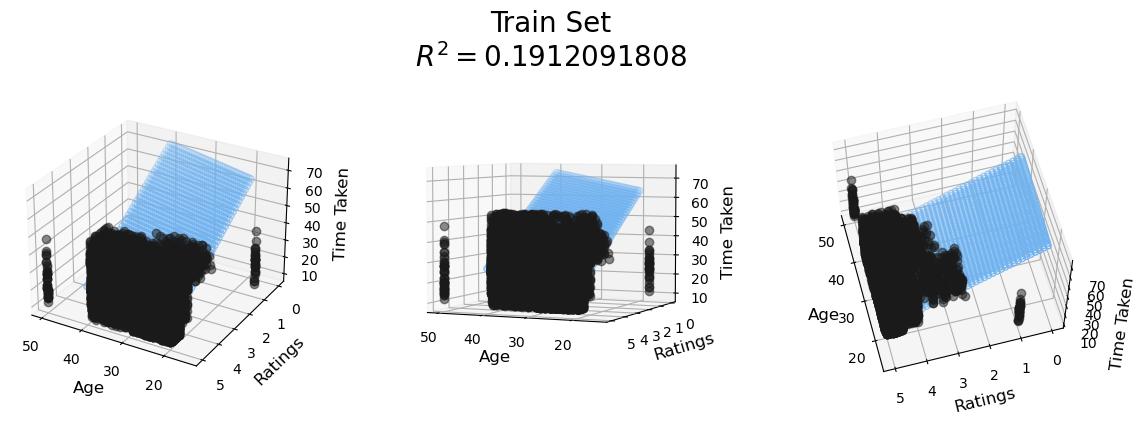

In [ ]:
X = X_train.values.reshape(-1,2)
Y = y_train

x = X[:, 0]
y = X[:, 1]
z = Y['TimeTaken'].values

x_pred = np.linspace(20, 40, 40)  # range of age values
y_pred = np.linspace(0, 5, 40)  # range of ratings values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

linreg = linear_model.LinearRegression()
model = linreg.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

# Display the plot
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Ratings', fontsize=12)
    ax.set_zlabel('Time Taken', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Train Set' + '\n'+ '$R^2 = %.10f$' % r2, fontsize=20)

fig.tight_layout()

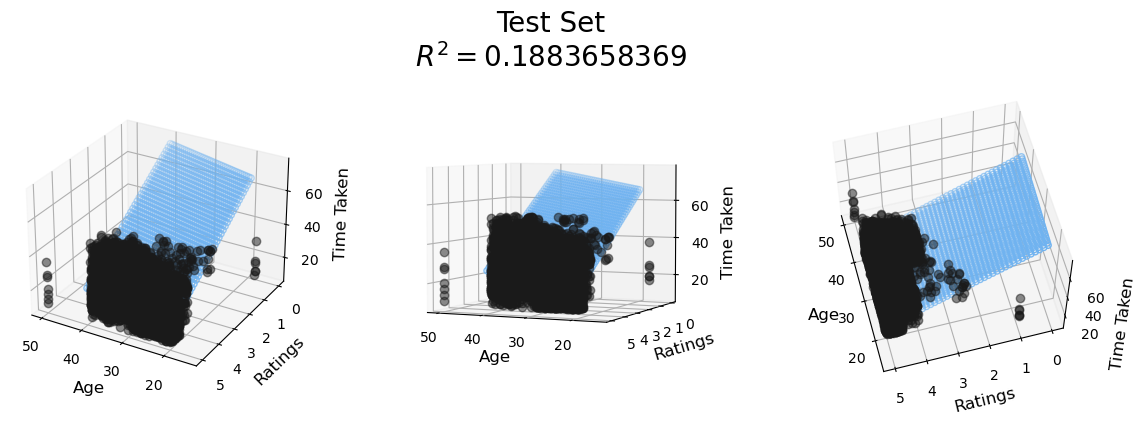

In [ ]:
X = X_test.values.reshape(-1,2)
Y = y_test

x = X[:, 0]
y = X[:, 1]
z = Y['TimeTaken'].values

x_pred = np.linspace(20, 40, 40)  # range of age values
y_pred = np.linspace(0, 5, 40)  # range of ratings values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

linreg = linear_model.LinearRegression()
model = linreg.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

# Display the plot
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Ratings', fontsize=12)
    ax.set_zlabel('Time Taken', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Test Set' + '\n'+ '$R^2 = %.10f$' % r2, fontsize=20)

fig.tight_layout()

The models absed on numerical data alone are quite bad, hence there needs a way to predict time taken using also categorical data. If we are able to use more features, then the model accuracy might increase.

# 2. Using both Categorical & Numerical Data

Linear regression can only use numerical data, hence we will try decision trees which allow for categorical data also. The bulk of the features in the data set are categorical data, so from now on its important to use models that allow for both numerical data and categorical data.

In [ ]:
categoricalData = ['WeatherConditions', 'RoadTrafficDensity', 'VechicleCondition','TypeOfOrder','TypeOfVehicle',
                   'MultipleDeliveries','Festival','City']
row = []
for x in categoricalData:
    row.append([data[x].nunique(), data[x].unique()])
    
compare = pd.DataFrame(row, columns = ['Number', 'Categories'], 
                      index = categoricalData)

pd.set_option('max_colwidth', 100)
display(compare)

,Number,Categories
WeatherConditions,6,"[Sunny, Stormy, Sandstorms, Cloudy, Fog, Windy, nan]"
RoadTrafficDensity,4,"[High, Jam, Low, Medium]"
VechicleCondition,4,"[2, 0, 1, 3]"
TypeOfOrder,4,"[Snack, Drinks, Buffet, Meal]"
TypeOfVehicle,4,"[Motorcycle, Scooter, Electric_scooter, Bicycle]"
MultipleDeliveries,4,"[0, 1, 3, 2]"
Festival,2,"[No, Yes, nan]"
City,3,"[Urban, Metropolitian, Semi-Urban]"


## 2.1 General Feature Selection & Data Preparation

### 2.1.1 See distribution of each categorical feature

To check which categorical data will be the best predicotr, we can check the distributions, which are more highly correlated. This is to remove features that aren't great predictors as too many features can slow down training time and increase inaccuracy of the models.

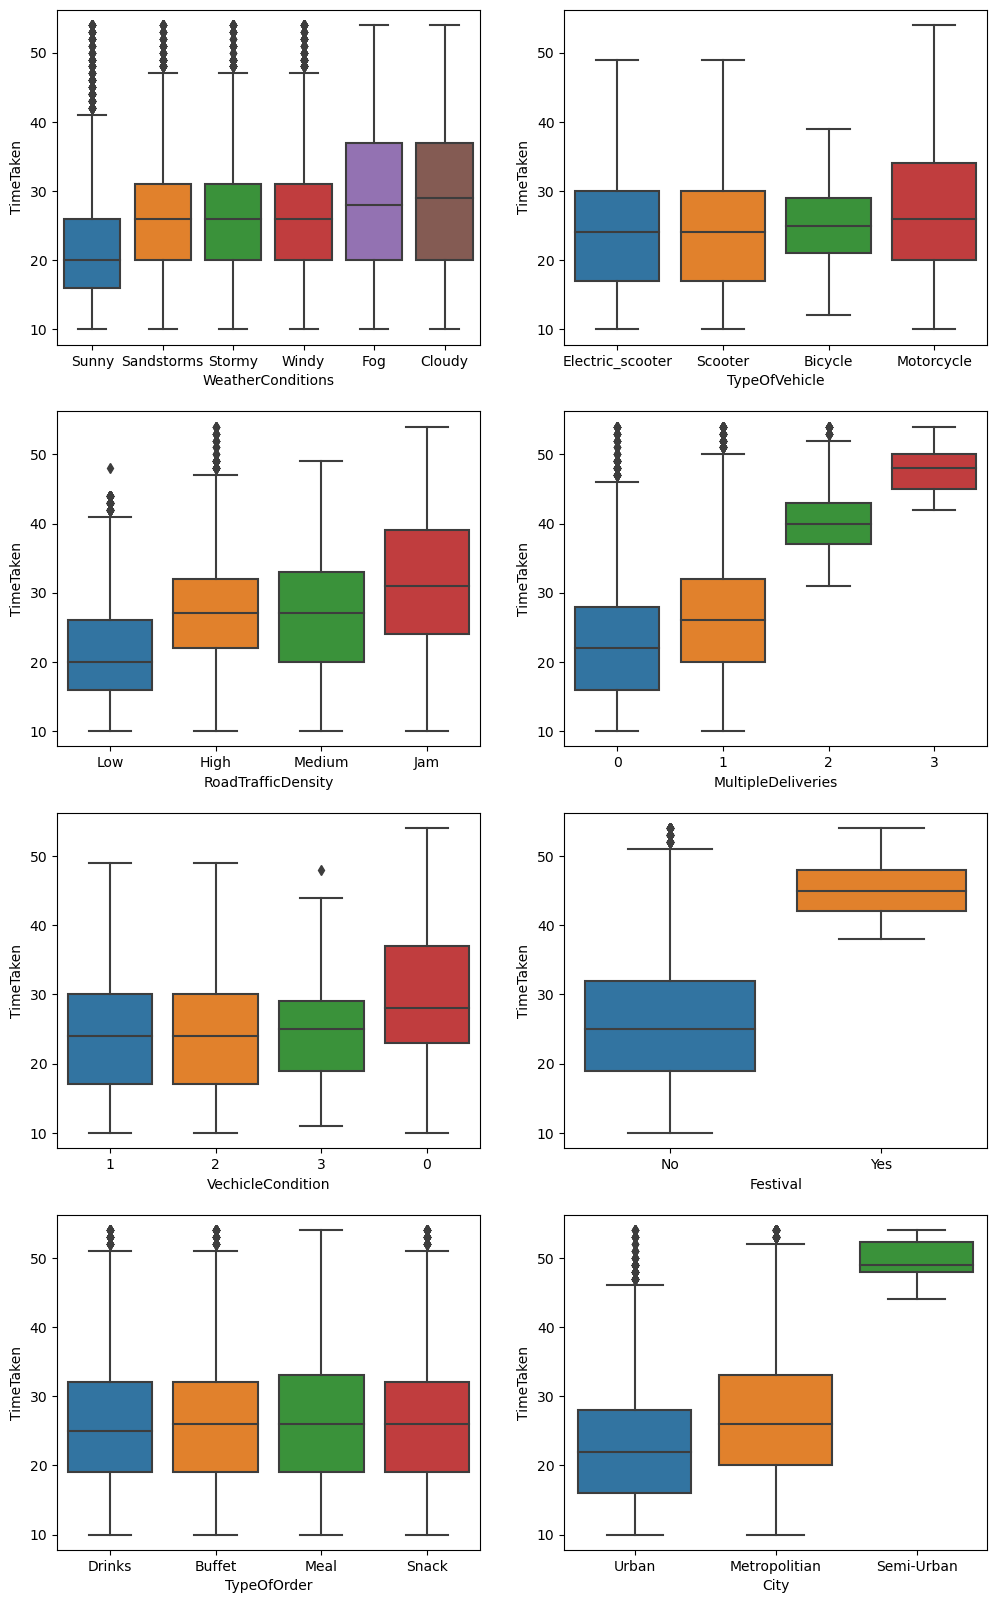

In [ ]:
categoricalData = ['WeatherConditions', 'RoadTrafficDensity', 'VechicleCondition','TypeOfOrder']

f, axes = plt.subplots(4, 2, figsize=(12,20))
for i,x in enumerate(categoricalData):
    order = data.groupby(by=[x])["TimeTaken"].median().sort_values().index
    sb.boxplot(data=data, x=x, y='TimeTaken', ax = axes[i,0], order=order)
    
categoricalData = ['TypeOfVehicle','MultipleDeliveries','Festival','City']

for i,x in enumerate(categoricalData):
    order = data.groupby(by=[x])["TimeTaken"].median().sort_values().index
    sb.boxplot(data=data, x=x, y='TimeTaken', ax = axes[i,1], order=order)
plt.show()

From the above graphs, we can see that the seemingly best features to use for predicting TimeTaken are Festival, City, and MultipleDeliveries.

### 2.1.2 ANOVA Test to quantify and verify observations from the distributions

We can further verify this using an ANOVA test. The ANOVA test measures the difference of the mean between different categories. It calculates:

1. P-value: probability that the difference of mean is purely due to chance 
2. F-value: ratio between the variance of the mean between the groups and the variance within the group itself

The higher the F-value and the lower the P-value, the more correlated the predicted value is with the predictor.

In [ ]:
categoricalData = ['WeatherConditions', 'RoadTrafficDensity', 'VechicleCondition','TypeOfOrder','TypeOfVehicle',
                   'MultipleDeliveries','City','Festival']

row = []
for x in categoricalData:
    CategoryGroupLists=data.groupby(x)['TimeTaken'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    row.append([AnovaResults[0], AnovaResults[1]])
    
compare = pd.DataFrame(row, columns = ['F-Value', 'P-Value'], 
                      index = categoricalData)

pd.set_option('max_colwidth', 100)
display(compare)

,F-Value,P-Value
WeatherConditions,594.653620,0.000000e+00
RoadTrafficDensity,3264.776322,0.000000e+00
VechicleCondition,1272.417725,0.000000e+00
TypeOfOrder,1.031479,3.773037e-01
TypeOfVehicle,412.443909,3.121529e-264
MultipleDeliveries,3279.864846,0.000000e+00
City,1283.722912,0.000000e+00
Festival,3997.863317,0.000000e+00


Type of order F-value and P-Value is not significant enough, hence we will be dropping it.

### 2.1.3. Encode using One Hot Encoding

As many of our categorical columns have more than 2 values, One Hot Encoding (OHE) will be used to split each column's unique value to separate columns. This preserves the original data information as each binary columns will be created for each category in a column. OHE also allows us to fit categorical values into ML algorithms meaningfully as most algorithms only work with numerical data.

In [ ]:
ohe = OneHotEncoder()

dataOH = data[['RoadTrafficDensity','MultipleDeliveries','Festival', 'City', 'VechicleCondition', 
               'TypeOfVehicle', 'WeatherConditions']]
ohe.fit(dataOH)
dataOH = pd.DataFrame(ohe.transform(dataOH).toarray(), 
                                  columns=ohe.get_feature_names_out(dataOH.columns))

dataOH = pd.concat([data[['TimeTaken', 'DeliveryPersonAge', 'Ratings']].reset_index(drop=True),
                    dataOH.reset_index(drop=True)], axis = 1)

dataOH.head()

,TimeTaken,DeliveryPersonAge,Ratings,RoadTrafficDensity_High,RoadTrafficDensity_Jam,RoadTrafficDensity_Low,RoadTrafficDensity_Medium,MultipleDeliveries_0,MultipleDeliveries_1,MultipleDeliveries_2,...,TypeOfVehicle_Electric_scooter,TypeOfVehicle_Motorcycle,TypeOfVehicle_Scooter,WeatherConditions_Cloudy,WeatherConditions_Fog,WeatherConditions_Sandstorms,WeatherConditions_Stormy,WeatherConditions_Sunny,WeatherConditions_Windy,WeatherConditions_nan
0,24,37,4.9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,33,34,4.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26,23,4.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,21,38,4.7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30,32,4.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.1.4. Splitting the Data

In [ ]:
x = dataOH.drop(['TimeTaken'], axis = 1)
y = dataOH['TimeTaken']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

## 2.2 Decision Tree & Random Forest

Decision Tree Regressors are able to use both numerical and categorical data. They also don't rely on underlying relationships between data. Since most of our data are categorical and non-linear, using decision trees allow for better fit on the non-linear features.

### 2.2.1 Feature selection using random forest

The collumns in OH Encoding is far too many, there needs a way to limit it, since we are using decision trees, then we will use the feature selection method in the decision tree module

In [ ]:
RF = RandomForestRegressor( criterion = 'squared_error', random_state = 42)
RF.fit(x_train, y_train)

importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Ratings,0.271
DeliveryPersonAge,0.176
RoadTrafficDensity_Low,0.135
VechicleCondition_0,0.099
WeatherConditions_Sunny,0.072
RoadTrafficDensity_Jam,0.031
MultipleDeliveries_2,0.025
WeatherConditions_Cloudy,0.023
WeatherConditions_Fog,0.022


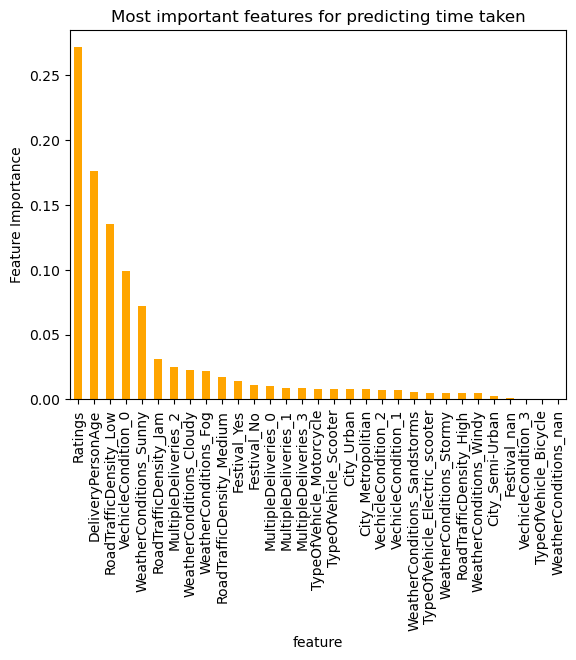

In [ ]:
importances.plot(kind='bar', color = "orange", title = "Most important features for predicting time taken", legend = None)
plt.ylabel('Feature Importance')
plt.show()

We will only be using only the top 8 features, drop the rest.

In [ ]:
newfeats_x_train = x_train[['Ratings','DeliveryPersonAge', 'RoadTrafficDensity_Low', 'VechicleCondition_0', 
                      'WeatherConditions_Sunny','RoadTrafficDensity_Jam', 'MultipleDeliveries_2', 
                      'WeatherConditions_Cloudy']]
newfeats_x_test = x_test[['Ratings','DeliveryPersonAge', 'RoadTrafficDensity_Low', 'VechicleCondition_0', 
                         'WeatherConditions_Sunny','RoadTrafficDensity_Jam', 'MultipleDeliveries_2', 
                         'WeatherConditions_Cloudy']]

### 2.2.2. Modelling the decision tree

,R^2 Score,MSE
Decision Tree,0.427998,50.002259


Tree Depth 3
Terminal Nodes 8


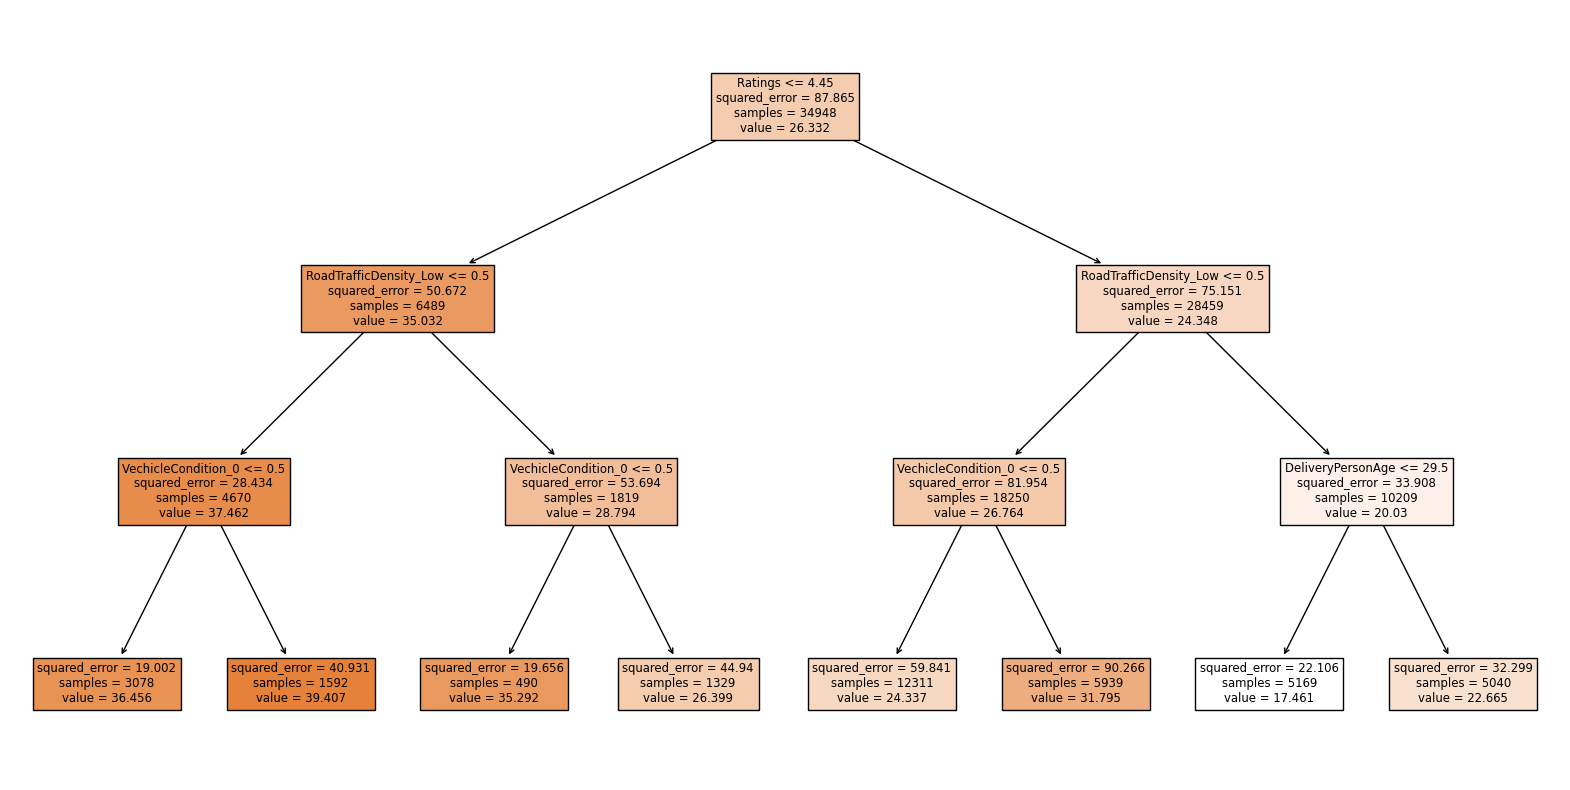

In [ ]:
dtree = DecisionTreeRegressor(random_state = 42, max_depth = 3)
dtree.fit(newfeats_x_train,y_train)

dtree_pred = dtree.predict(newfeats_x_test)
r2 = r2_score(y_test, dtree_pred)
mse = mean_squared_error(y_test, dtree_pred)

compare = pd.DataFrame(np.array([[r2, mse]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Decision Tree'])
display(compare)

print("Tree Depth",dtree.get_depth())
print("Terminal Nodes", dtree.get_n_leaves())

_, ax = plt.subplots(figsize=(20,10)) # Resize figure
plot_tree(dtree, filled=True, ax=ax, feature_names=newfeats_x_train.columns.tolist())
plt.show()

results.append([r2, mse])
models.append('Decision Tree')

### 2.2.3. Modelling the Random Forest

The algorithm is an extension of the decision tree algorithm that works by using an ensemble of decision trees to make numerical predictions. This allows us to create robust model that is less prone to overfitting as compared to a single decision tree.

#### 2.2.3.1. Normal random forest

In [ ]:
rforest = RandomForestRegressor( criterion = 'squared_error', random_state = 42, n_estimators = 100)
rforest.fit(newfeats_x_train, y_train)

rforest_pred = rforest.predict(newfeats_x_test)
r2 = r2_score(y_test, rforest_pred)
mse = mean_squared_error(y_test, rforest_pred)

compare = pd.DataFrame(np.array([[r2, mse]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Random Forest'])
display(compare)

results.append([r2, mse])
models.append('Random Forest')

,R^2 Score,MSE
Random Forest,0.626945,32.611058


#### 2.2.3.2 Random forest with Grid Search Cross Validation

To improve ont he previous model, we will use Grid Search Cross Validation which allows SKLEARN to generate best depth that has better accuracy and does not overfit.

In [ ]:
param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'max_features': ['sqrt', 'log2', None],
}

rf_grid_search = GridSearchCV(rforest, param_grid=param_grid,
                              cv = 3, scoring = 'neg_mean_squared_error',
                              return_train_score = True )

rf_grid_search.fit(newfeats_x_train, y_train)
rf_grid_search.best_params_

rforest_grid_search_pred = rf_grid_search.predict(newfeats_x_test)
r2 = r2_score(y_test, rforest_grid_search_pred)
mse = mean_squared_error(y_test, rforest_grid_search_pred)

compare = pd.DataFrame(np.array([[r2, mse]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Random Forest with CV'])
display(compare)

results.append([r2, mse])
models.append('Random Forest CV')

,R^2 Score,MSE
Random Forest with CV,0.657132,29.972224


## 2.3 Lasso Regression

Lasso works by regularisation, a technique to prevent overfitting by introducing a penalty term to the cost function. More specifically, the cost function is the sum of squared errors with the introduction of the L1 norm (Manhattan Distance) constraint. We use lasso because it penalises the coefficients values, shrinking them to be close to zero or even zero, which effectively "selects" features for us. 

Using a stricter model for feature selection allows us to remove unnecesary features that obscure the model. This is important because most of the features in our data have non-linear relationships. Removing unnecesary features not only reduces the complexity and hence time for training but also the accuracy of the model.

### 2.3.1 Feature Selection

Lasso regression is stricter in its feature selection. Features that are highly related will be removed, and only one out of the  features will be used in the model. We will select the top 8 features for the lasso regression. 

In [ ]:
lassocv = LassoCV(cv = 10)

lassocv.fit(x_train, y_train)
alpha = lassocv.alpha_
print("Best alpha :", alpha)

Best alpha : 0.016475858091209637


Alpha is penalty which controls tradeoff between complexity and overfitting. Here we're finding the best alpha to use which finds the best middle ground between complexity and overfitting. This helps in finding which features to include/remove.

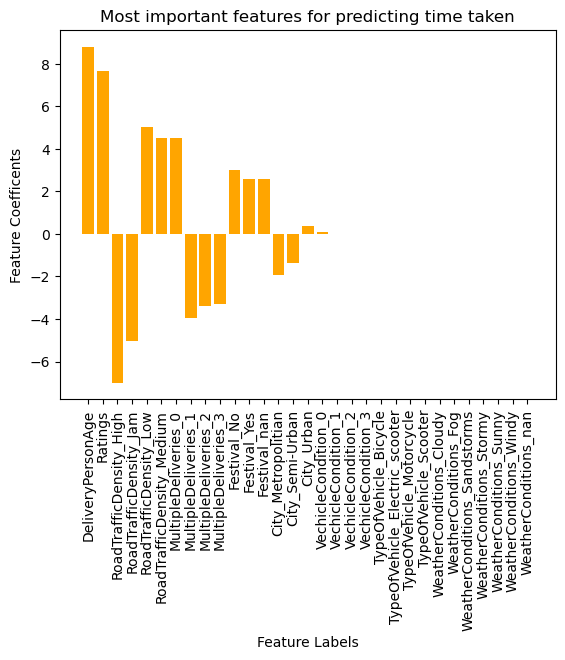

In [ ]:
lasso_selector = SelectFromModel(Lasso(alpha = alpha, random_state = 42))
lasso_selector.fit(x_train, y_train)

coefs = lassocv.coef_
plt.bar(x_train.columns, sorted(coefs, key = lambda x: abs(x), reverse = True), color = 'orange')
plt.xticks(rotation = 'vertical')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Coefficents')
plt.title('Most important features for predicting time taken')
plt.show()

We will use all 16 non-zero features

In [ ]:
newfeats_x_train = x_train[['DeliveryPersonAge', 'Ratings', 'RoadTrafficDensity_High', 'RoadTrafficDensity_Jam',
                            'RoadTrafficDensity_Low', 'RoadTrafficDensity_Medium', 'MultipleDeliveries_0',
                            'MultipleDeliveries_1', 'MultipleDeliveries_2', 'MultipleDeliveries_3',
                            'Festival_No', 'Festival_Yes', 'City_Metropolitian', 'City_Semi-Urban', 'City_Urban',
                            'VechicleCondition_0']]
newfeats_x_test = x_test[['DeliveryPersonAge', 'Ratings', 'RoadTrafficDensity_High', 'RoadTrafficDensity_Jam',
                            'RoadTrafficDensity_Low', 'RoadTrafficDensity_Medium', 'MultipleDeliveries_0',
                            'MultipleDeliveries_1', 'MultipleDeliveries_2', 'MultipleDeliveries_3',
                            'Festival_No', 'Festival_Yes', 'City_Metropolitian', 'City_Semi-Urban', 'City_Urban',
                            'VechicleCondition_0']]

### 2.3.2 Modelling the lasso regression

,R^2 Score,MSE
Lasso Regression,0.531724,40.934936


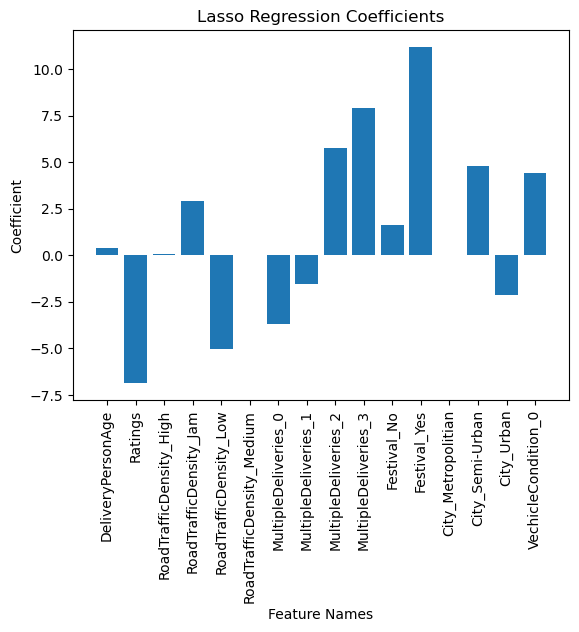

In [ ]:
lasso_reg = Lasso(alpha = alpha, random_state = 42)
lasso_reg.fit(newfeats_x_train, y_train)

lasso_reg_pred = lasso_reg.predict(newfeats_x_test)
r2 = r2_score(y_test, lasso_reg_pred)
mse = mean_squared_error(y_test, lasso_reg_pred)

compare = pd.DataFrame(np.array([[r2, mse]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Lasso Regression'])
display(compare)

plt.figure()
plt.bar(lasso_reg.feature_names_in_, lasso_reg.coef_)
plt.xlabel('Feature Names')
plt.xticks(rotation=90)
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.show()

results.append([r2, mse])
models.append('Lasso Regression')

## 2.4 XGBoost

Extreme Gradient Boosting (XGBoost) a widely used technique to see if we can attain better performance. XGBoost iteratively adds decision trees to the model where each tree corrects the errors made by the previous trees. XGBoost utilised L1 and L2 regularisation to prevent overfitting and utilises gradient-based optimisation to update the weights of the tree. 

### 2.4.1 Normal XGBoost

XGBoost without feature selection, uses all features except TypeOfOrder. Then we will use XGBCrossValidation to imporve it further.

In [ ]:
xgb_reg = XGBRegressor(n_estimators=25,learning_rate=0.1,alpha=0.1,seed=42).fit(x_train, y_train)
xgb_reg_pred = xgb_reg.predict(x_test)

r2 = r2_score(y_test, xgb_reg_pred)
mse = mean_squared_error(y_test, xgb_reg_pred)

compare = pd.DataFrame(np.array([[r2, mse]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['Normal XGBoost'])
display(compare)

results.append([r2, mse])
models.append('XGBoost')

,R^2 Score,MSE
Normal XGBoost,0.661872,29.557848


### 2.4.2 Cross Validation XGBoost

We will do cross validation, the best models are put into `cvboosters`. Then we will use one of the models from `cvboosters` to test on the test data.

In [ ]:
class SaveBestModel(xgb.callback.TrainingCallback):
    def __init__(self, cvboosters):
        self._cvboosters = cvboosters
    
    def after_training(self, model):
        self._cvboosters[:] = [cvpack.bst for cvpack in model.cvfolds]
        return model
    
cvboosters = []

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 150, 'alpha': 10}

data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=150, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=42,
                    callbacks=[SaveBestModel(cvboosters), ])

display(xgb_cv)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,24.954790,0.013145,24.954997,0.127169
1,22.710379,0.030813,22.711117,0.146320
2,20.690285,0.050261,20.688506,0.157408
3,18.869738,0.049534,18.869297,0.147581
4,17.257230,0.055036,17.254277,0.136107
...,...,...,...,...
145,4.678109,0.049234,5.011351,0.047971
146,4.676891,0.049189,5.010760,0.048632
147,4.674684,0.049253,5.010112,0.048347
148,4.672793,0.049602,5.009287,0.048028


We select the first model and use it to fit the test set.

In [ ]:
dtest = xgb.DMatrix(data=x_test)
xgb_cv_pred = cvboosters[0].predict(dtest)

r2 = r2_score(y_test, xgb_cv_pred)
mse = mean_squared_error(y_test, xgb_cv_pred)

compare = pd.DataFrame(np.array([[r2, mse]]), 
                      columns=['R^2 Score', 'MSE'], 
                      index =['CV XGBoost'])
display(compare)

results.append([r2, mse])
models.append('XGBoost CV')

,R^2 Score,MSE
CV XGBoost,0.705442,25.749111


# 3. Results

We will show the results from the models earlier. The measure of accuracy is R^2 and MSE. R^2 closer to 1 means better model, while lower MSE meand better model. These results are after fitting the model to the training set and predicting the test set.

In [ ]:
compare = pd.DataFrame(results, 
                      columns=['R^2 Score', 'MSE'], 
                      index = models)
display(compare)

,R^2 Score,MSE
Uni LinReg Age,0.082976,80.162816
Uni LinReg Ratings,0.116581,77.225152
Multi LinReg,0.187739,71.004839
Decision Tree,0.427998,50.002259
Random Forest,0.626945,32.611058
Random Forest CV,0.657132,29.972224
Lasso Regression,0.531724,40.934936
XGBoost,0.661872,29.557848
XGBoost CV,0.705442,25.749111


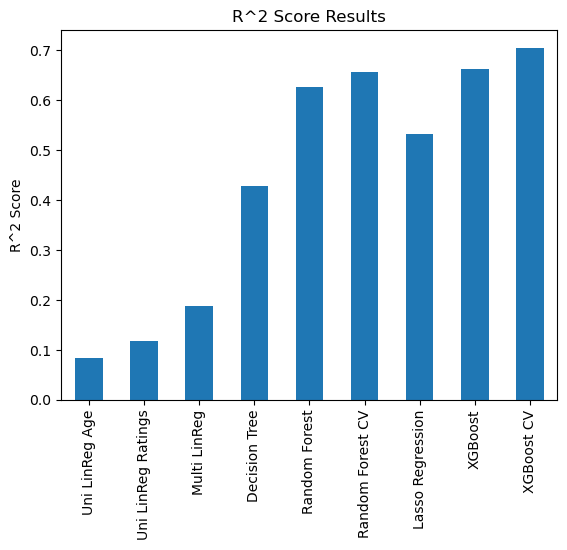

In [ ]:
r2compare = compare['R^2 Score']

r2compare.plot(kind='bar', title = "R^2 Score Results", legend = None)

plt.ylabel('R^2 Score')
plt.show()

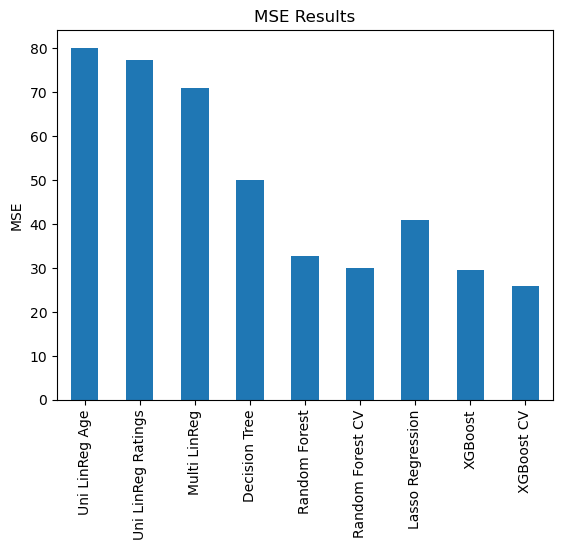

In [ ]:
msecompare = compare['MSE']

msecompare.plot(kind='bar', title = "MSE Results", legend = None)

plt.ylabel('MSE')
plt.show()

In [ ]:
compare.to_csv(r'prev_model_results.csv', 
               index=['Multi LinReg', 'Decision Tree', 'Random Forest', 'Random Forest CV', 
                      'Lasso Regression', 'XGBoost', 'XGBoost CV'])